# Exploratory analysis on the Iris Dataset

## 1. Import required packages and Load and Clean Iris Dataset 

### 1.1 Import required packages

In [1]:
# Working with multidimensional number arrays
import numpy as np
# Plotting
from matplotlib import pyplot as plt
# Working with dataframes
import pandas as pd
# AnchoredText helps to add texts on a pyplot plots
from matplotlib.offsetbox import AnchoredText

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

# One Way Anova
from statsmodels.formula.api import ols

# Post-Hoc Tukey Test
import statsmodels.stats.multicomp as mc


### 1.2 Load the Iris data set

In [2]:
# Load the iris dataset
# The iris.data file does not have a header, hence, header=None,
# otherwise, the first row will become a header.
df = pd.read_csv("iris.data", header=None)

# Check out the first five rows of the df
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.3 Load the metadata of the Iris data set with 'with open()' function

If you only use open(), then you must use close() once you finished using a file. The file will stay open in a system and it will consume system's resources if you forget to specify close(). The method 'with open()' ensures that a file will be closed after its use to spare a system's resources.

*See ref on how to use 'with open()' to savely open and close files  
https://note.nkmk.me/en/python-file-io-open-with/*

In [3]:
# rt means to read a text file where r stands for read and t for text file
with open("iris.names", "rt") as file:
    content = file.read()
    print(content)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

### 1.4 Extract the attribute information from the metadata file

In the code cell above, we opened the metadata file of the Iris data set and we found five attributes that correspond to five columns in the iris.data file, respectively: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm and class. We will label the five columns of the Iris data set with those attributes.

In [8]:
# Create an object with features' names of numerical variables plus class of categorical variables
feature_names = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
# Set the column names as feature names
df.columns = feature_names + ["species"]
# Check out the head of df
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.5 Clean the df

In the code cell below, we will (1) check if the columns contains nan values and (2) we will clean class column that contains categorical variables about Iris dataset. 
1. We will replace missing values with appropriate information. We will replace missing numerical values with zero and remove samples that does not have class information. Firstly, pd.isna() outputs the df the same size as the input, although, the cells contain Boolean values. The cell becomes False if it does not contain nan, else, the cell becomes True if it does contain nan. This allows us to use .sum() function and see a broader picture if any of the column contains nan values. sum() considers True as the value 1 and False as the value 0, hence, we should see the total sum of 0 if the columns does not contain nan.
2. All values in the class column contains 'Iris-' prefix which is not necessary in this analysis. We already know that these samples comes from Iris genus and we can keep only a species name to keep only informative details of samples.

*See ref. on how to get the string variables of a pandas df column:  
https://note.nkmk.me/en/python-pandas-str-replace-strip-etc/*

In [9]:
# Check if columns do have nan values
pd.isna(df).sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

In [78]:
# Remove Iris- prefix from all values in the class column
df["species"] = df["species"].str.replace("Iris-", "")
# Show the head of df
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Summary statistics
### 2.1 Calculate summary statistics


*Calculate mean, standard deviation, minima, maxima and median with numpy  
https://numpy.org/doc/stable//reference/routines.statistics.html*

*Calculate percentiles and quartiles with numpy  
https://numpy.org/doc/2.1/reference/generated/numpy.quantile.html*

*Built-in python function round() to round numbers to a certain decimal point  
https://docs.python.org/3/library/functions.html*

*Replace certain value in a string with another value  
https://www.w3schools.com/python/ref_string_replace.asp*

*Create an empty numpy array  
https://numpy.org/doc/2.1/reference/generated/numpy.empty.html*

*See ref. on how to access specific rows and columns in pandas df  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html*

*Function enumerate() allows to loop through an object while returning number of iterations  
https://www.geeksforgeeks.org/enumerate-in-python/*

In [11]:
adict = dict()
features = df.columns[:4]
statistics = ["mean", "std", "min", "max", "Qone", "Qtwo", "Qthree"]

for feature in features:

    feature_series = df[feature]
    
    mean = round(np.mean(feature_series), 2) # Compute mean
    std = round(np.std(feature_series), 2) # Compute standard
    minima = round(np.min(feature_series), 2) # Compute minimum
    maxima = round(np.max(feature_series), 2) # Compute maximum
    Qone = round(np.quantile(feature_series,0.25), 2) # Compute first quartile
    Qtwo = round(np.median(feature_series), 2) # Compute second quartile
    Qthree = round(np.quantile(feature_series,0.75), 2) # Compute third quartile
    
    adict[feature] = [mean, std, minima, maxima, Qone, Qtwo, Qthree]

sum_stats = pd.DataFrame(adict)
sum_stats.index = [statistics]
sum_stats

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
max,7.90,4.40,6.90,2.50
Qone,5.10,2.80,1.60,0.30
Qtwo,5.80,3.00,4.35,1.30
Qthree,6.40,3.30,5.10,1.80


### 2.2 Save summary statistics to a text file

*Convert pandas df to a text file  
https://saturncloud.io/blog/how-to-write-a-pandas-dataframe-to-a-txt-file/#:~:text=txt%20File-,To%20write%20a%20Pandas%20dataframe%20to%20a%20.,txt*

In [12]:
sum_stats.to_csv('sum_stats.txt', sep='\t', index=True)

## 3. Difference between Iris classess

In this section, we will examine the difference between different Iris species, setosa, versicolor and virginica, four four Iris features: sepal length, sepal width, petal length and petal width. In this examination, we will use an ANOVA method which is a suitable method to test the difference between the groups when there are more than two groups in the dataset. However, ANOVA has three assumptions. The data must be normally distributed, must have homogenous variance and the meassurements must be independent. If the data meets the assumptions, then, we will use One Way ANOVA method. One Way ANOVA method is suitable for datasets that meets all assumptions and has only one variable, in our case, the variable is species. Nonetheless, if the data is not normal or it does not have equal variance, then we have two options, either transform data or perform Welsch's ANOVA which is a suitable method for the datasets that does not meet assumptions. In addition, if the data does not meet the independence criteria, then, we either have to collect new samples in a way that makes the data independent or we have to include the variable, that makes data dependent, in the regression model. Although, we will firstly perform data transformation before we decide to use Welsch's ANOVA method. There are many ways how you can transform data but here we will use five methods: square-root, log, the power of square, exponential and reciprocal transformation. If the data meets the assumptions after transformation, then, we will use transformed data with One Way ANOVA. However, if none of the transformations were able to change the data in the way so it could meet all of the assumptions, then, we will use Welch's ANOVA method. 



### Initial examination of the datasets, Stacked Bar Histogram and KDE plot 

### 3.1 Visual Examination of Normality, Homogeneity of variance, Independence

Here, we will use visual aids to examine normality, homogeneity of variance and independence. To assess normality, we will plot the histogram of residuals of the dataset and QQ-plot of theorhetical quantiles vs residual quantiles of the dataset. Residuals of the dataset are the difference between an observed data value and a predicted data value (see ref. https://www.displayr.com/learn-what-are-residuals/). We could also test these assumptions on original data, although, the residuals of the whole dataset allows to examine dataset at once, because all residuals sum to one for each species and it allows to test the assumptions without the noise of original data. The histogram of the residuals shows us the distribution of data and we are looking for a bell shape curve in the graph. The QQ-plot is a quantile-quantile of theorethical and residual quantiles plot. In this plot, residual quantiles are plotted against theorethical quantiles of normal distribution. In the QQ-plot, we seek that the dot would go in a straight line. Any deviation from the straight line shows deviations from normality.
Furthermore, to assess the homogeneity of variance, we will plot residuals vs fitted values (the mean of the species) and we aim to see approximately the same length lines (one line on the plot for each species) which would signify that dataset has equal variance. Moreover, to test the independence of the dataset, we will plot ordered values vs residuals and we will aim to see a random pattern. A non-random pattern signifies that data is dependent on some variables.

*Histogram plotting  
https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ & https://matplotlib.org/stable/gallery/statistics/hist.html*

*String capitalisation  
https://www.w3schools.com/python/ref_string_capitalize.asp*

*Subplotting with matplotlib  
https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html#sphx-glr-users-explain-axes-constrainedlayout-guide-py*

*KDE plot  
https://seaborn.pydata.org/generated/seaborn.kdeplot.html*

*What does QQ-plot mean?  
https://www.datacamp.com/tutorial/qq-plot?dc_referrer=https%3A%2F%2Fwww.google.com%2F*

*Theory about assessment of normality, equal variance and independence for ANOVA  
https://www.youtube.com/watch?v=1qqTAgamMGw*

*Using matplotlib axes for seaborn plots  
https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface*

*Stats probplot  
https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html*

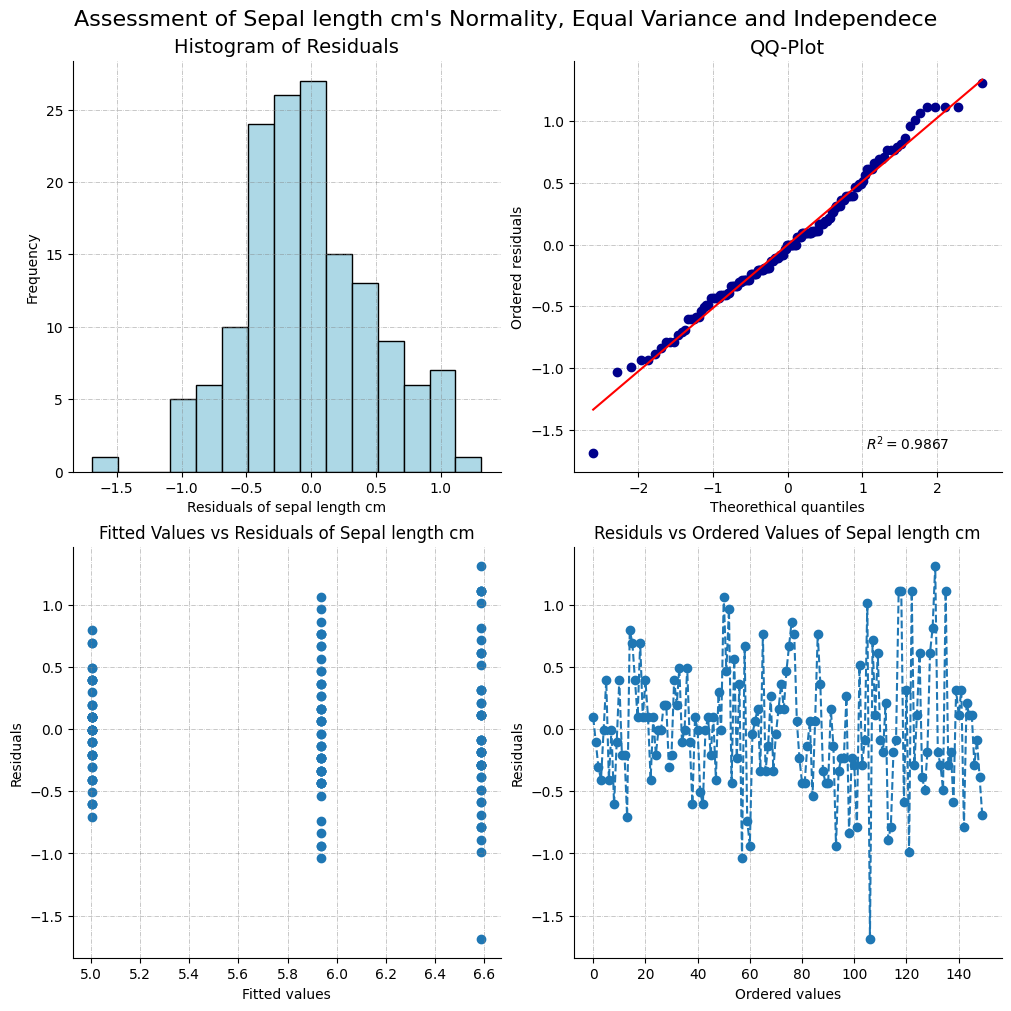

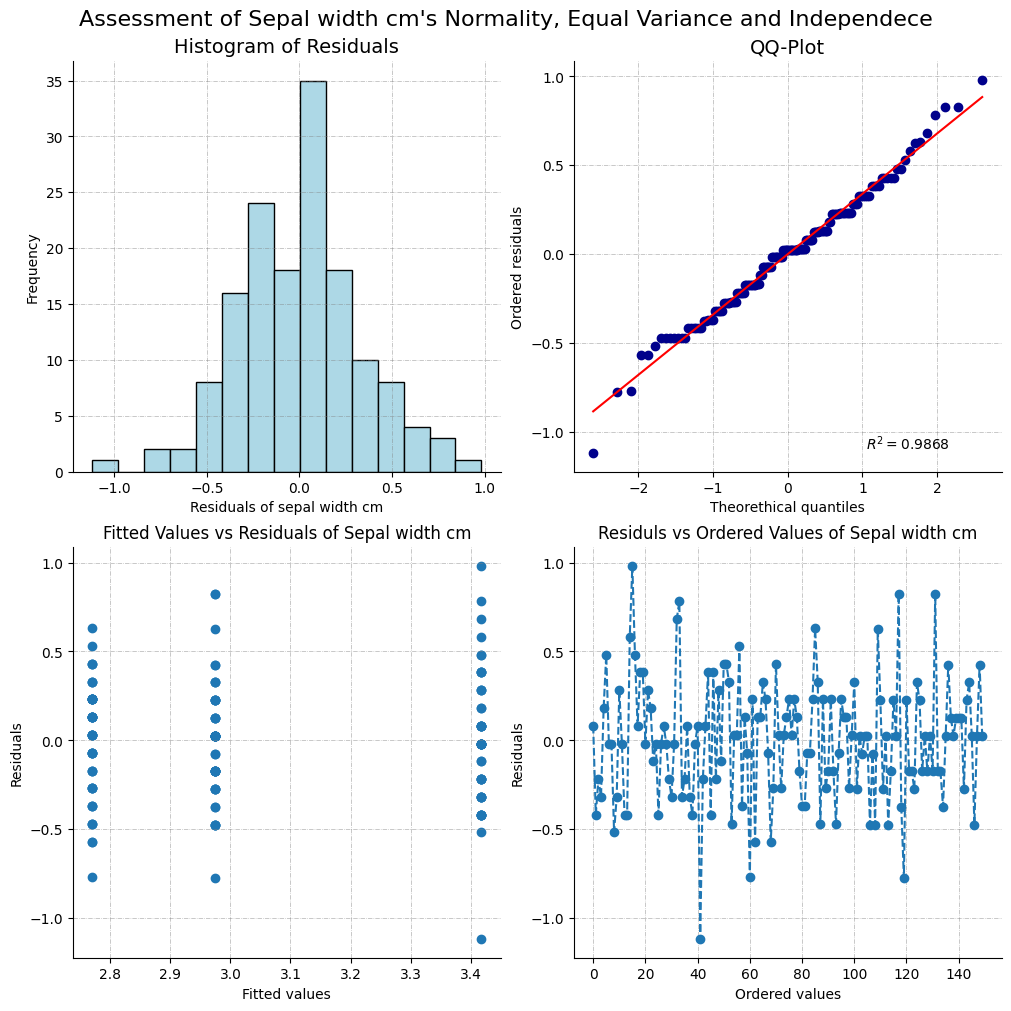

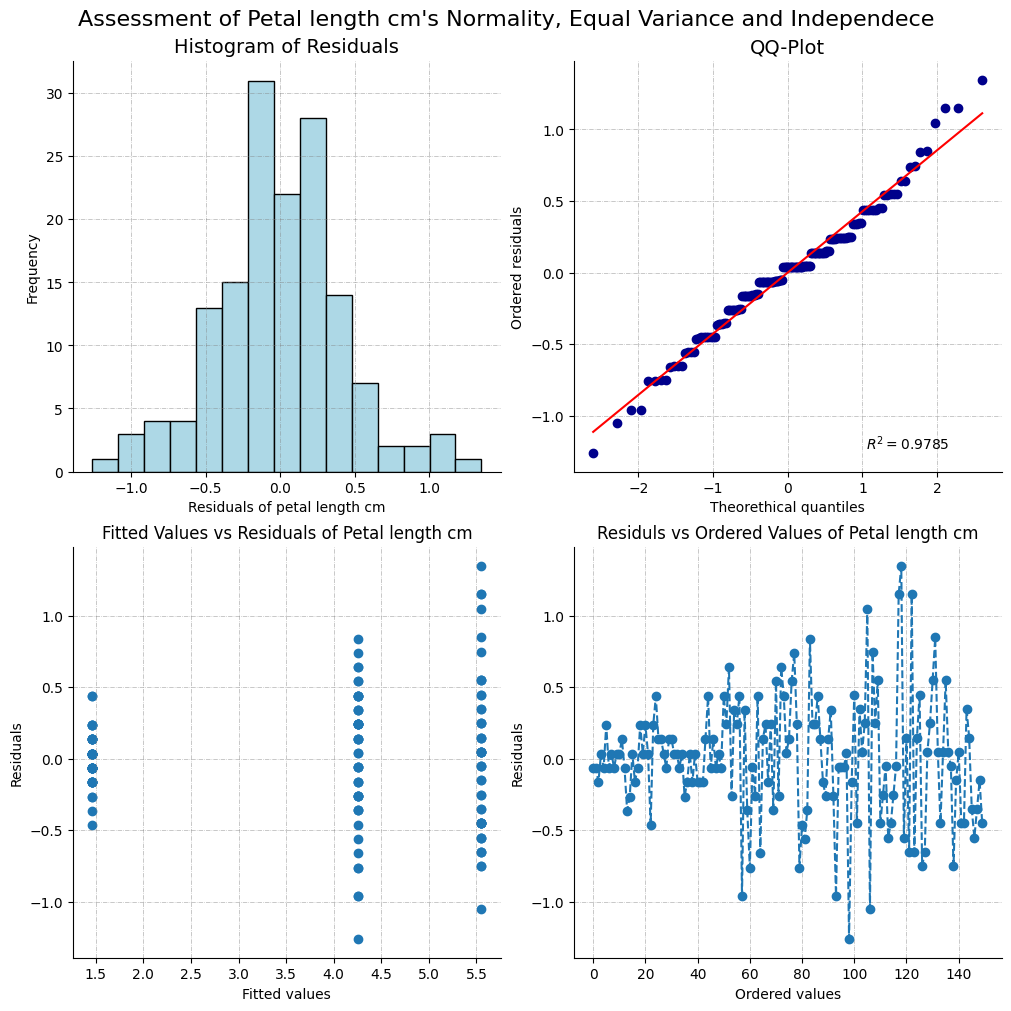

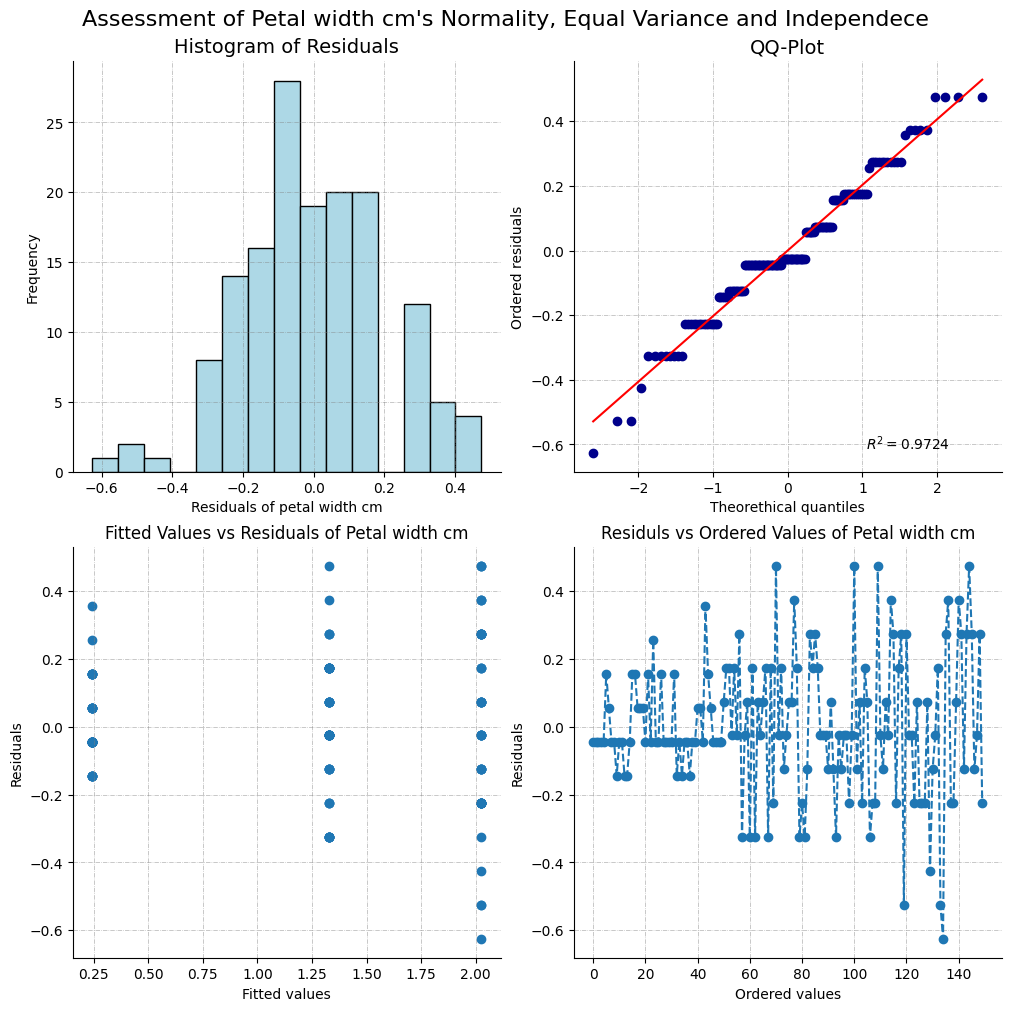

In [13]:
for feature in features:
    
    # Define a layout of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
    
    # Define the classes names
    classes = list(df.iloc[:,4].unique())
    # Define the feature names
    features = df.iloc[:,:4].columns
    # Define the feature names so you could use for naming axes or titles
    feature_name = feature.replace("_", " ")

    # Calculate residuals of a feature
    # Store residuals
    resid = []
    # Store fitted values
    fitted_values = []
    # Iterate through each class and calculate residuals for a feature
    for aclass in classes:
        # Create a temporary df which contains only one class samples
        temp_df = df[df["species"] == aclass]
        # Select values of a particular feature
        df1 = temp_df[feature]
        # Calculate the mean of a feature for a particular class
        df1_mean = np.mean(df1)
        # Create fitted values for each corresponding residual
        fitted_values += [df1_mean] * len(df1)
        # Compute residuals of a feature for a particular class
        df1_resid = [float(round(x - df1_mean, 3)) for x in df1]
        # Add residuals of a feature to the df that contains residuals of other classes
        resid = resid + df1_resid
    

    # Flatten out the axes so you could iterate through them
    axs = axs.flat
    for count, ax in enumerate(axs):

        # Remove axes splines 
        for s in ['top', 'right']: 
            ax.spines[s].set_visible(False) 

        # Add x, y gridlines 
        ax.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6)
        
        
        
        if count == 0:
            ax.hist(resid, bins=15, 
                        color="lightblue", edgecolor='black')
            ax.set_xlabel(f"Residuals of {feature_name}", fontsize=10)
            ax.set_ylabel("Frequency", fontsize=10)
            ax.set_title("Histogram of Residuals", fontsize=14)
            
        elif count == 1:
            stats.probplot(resid, dist="norm", plot=ax, rvalue=True)
            ax.lines[0].set_color('darkblue') 
            ax.set_xlabel("Theorethical quantiles", fontsize=10)
            ax.set_ylabel("Ordered residuals", fontsize=10)
            ax.set_title("QQ-Plot", fontsize=14)
        elif count == 2:
            ax.scatter(fitted_values,resid)
            ax.set_xlabel("Fitted values")
            ax.set_ylabel("Residuals")
            ax.set_title(f"Fitted Values vs Residuals of {feature_name.capitalize()}")
        else:
            ax.plot(resid, marker="o", linestyle="--")
            ax.set_xlabel("Ordered values")
            ax.set_ylabel("Residuals")
            ax.set_title(f"Residuls vs Ordered Values of {feature_name.capitalize()}")
            print("""
            
            
            """)

        
    # Set the title
    fig.suptitle(f'Assessment of {feature_name.replace(" (cm)", ""
).capitalize()}\'s Normality, Equal Variance and Independece', fontsize=16)
    # Save the plot
    plt.savefig(f"{feature}_assesment_of_norm_var_ind.png", dpi=300, bbox_inches = 'tight')
    # Show the plot
    plt.show()

If the datasets does not meet the Independence criteria, the dataset should not be tested or at least the variable that makes the data dependent should be included in the model to test difference between groups.

### Shapiro-Wilk test and Levene's test

In this code block, we will assess the normality with Shapiro Wilcoks Test and the homogeneity of variance, homoscedasticity, with Levene's test. The alpha value = 0.05.

Types of data trasnformations:
Square-root Transformation
Log Transformation
Power of square Transformation
Exponential Transformation
Reciprocal Transformation

1. Assessment of normality and homoscedasticity with original data. Only the Sepal width dataset (shapiro test p-value=0.32435 and levenes p-value=0.524827) was normally distributed and had homogenous variance with original data. Other three datasets did not meet either one or both of the assumptions. Hence, in the next step, will will perform data transformation on those three features to see if they will meet ANOVA's assumptions after data transformation.  
Shapiro's p-value=0.21886 for sepal_length_cm  
Levene's p-value=0.00225853 for sepal_length_cm  

Shapiro's p-value=0.32435 for sepal_width_cm  
Levene's p-value=0.524827 for sepal_width_cm  

Shapiro's p-value=0.03776 for petal_length_cm  
Levene's p-value=3e-08 for petal_length_cm  

Shapiro's p-value=0.00436 for petal_width_cm  
Levene's p-value=3e-08 for petal_width_cm  
  

2. Assessment of normality and homoscedasticity with transformed data. We will apply five types of data transformations described above: square-root, log, exponential, power of square, exponential and reciprocal transformations. Only the Sepal length's dataset (shapiro test p-value=0.24236 and levenes p-value=0.11437336) met the assumptions after data transformation. This dataset met the assumptions with log tranformation. Other two datasets, petal width and length, did not meet both assumptions after any of the five data transformations.

3. Conclusion of the analysis. We will perform One Way Anova on original dataset for sepal width and log transformed dataset for sepal length. However, two datasets, petal width and length, did not meet ANOVA's assumptions neither with original or transformed data. Hence, we will test the difference between differencet species for those two datasets with Welsch's ANOVA method which is a non-parametric method to test the difference between more than 2 groups for datasets that does not meet ANOVA's assumptions.


*Data transformation  
https://medium.com/data-science/types-of-transformations-for-better-normal-distribution-61c22668d3b9 & https://www.pythonfordatascience.org/parametric-assumptions-python/*

*Levene's test  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html*

*Linear regression model  
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.from_formula.html*

In [75]:
# Transform data
df_temp = df.copy()
df_temp["sepal_length_cm"] = np.log(df_temp["sepal_length_cm"])
df_temp["petal_length_cm"] = np.log(df_temp["petal_length_cm"])
df_temp["petal_width_cm"] = np.sqrt(df_temp["petal_width_cm"])


for feature in features:
    
    formula = f"{feature} ~ species"
    model = sm.OLS.from_formula(formula, df_temp)
    fitted_model = model.fit()
    resid = fitted_model.resid
        
    shapiro, shap_pval = stats.shapiro(resid)
    levene, lev_pval = stats.levene(resid[:50], resid[50:100], resid[100:])
    print(f"Shapiro's p-value={round(shap_pval, 5)} for {feature}")
    print(f"Levene's p-value={round(lev_pval, 8)} for {feature}")
    print()
    
    # Reset the model
    fitted_model = None

Shapiro's p-value=0.24236 for sepal_length_cm
Levene's p-value=0.11437336 for sepal_length_cm

Shapiro's p-value=0.32435 for sepal_width_cm
Levene's p-value=0.524827 for sepal_width_cm

Shapiro's p-value=0.04643 for petal_length_cm
Levene's p-value=0.72546901 for petal_length_cm

Shapiro's p-value=0.02247 for petal_width_cm
Levene's p-value=0.5651578 for petal_width_cm



### One Way ANOVA and Welsch's ANOVA for datasets that does not meet assumptions and Post-Hoc

Here, we will use ANOVA to see difference between species for each feature. In the examination for the ANOVA's assumptions, we find out that we will perform One Way ANOVA on original dataset for sepal width and log transformed sepal length datasets and Welsch's ANOVA for petal width and length. 


*Theory on one Way ANOVA  and Post-Hoc Tukey Tests
https://www.pythonfordatascience.org/anova-python/*

*Welch's ANOVA  
https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.anova_oneway.html*

In [94]:
df_temp = df.copy()
df_temp["sepal_length_cm"] = np.log(df_temp["sepal_length_cm"])
df_temp["petal_length_cm"] = np.log(df_temp["petal_length_cm"])
df_temp["petal_width_cm"] = np.sqrt(df_temp["petal_width_cm"])

for feature in features:
    
    formula = f"{feature} ~ species"
    
    if feature in ["sepal_length_cm", "sepal_width_cm"]:
        model = ols(formula, data=df_temp)
        fitted_model = model.fit()
    else:
        model = ols(formula, data=df_temp, welch_correction=True)
        fitted_model = model.fit()
    
    aov_table = sm.stats.anova_lm(fitted_model, typ=2)
    print(feature)
    print(aov_table)
    print()
    # Reset the model
    fitted_model = None

sepal_length_cm
            sum_sq     df           F        PR(>F)
species   1.891768    2.0  128.930218  4.580171e-33
Residual  1.078451  147.0         NaN           NaN

sepal_width_cm
           sum_sq     df          F        PR(>F)
species   10.9776    2.0  47.364461  1.327917e-16
Residual  17.0350  147.0        NaN           NaN

petal_length_cm
             sum_sq     df            F         PR(>F)
species   49.938800    2.0  1995.891258  2.868716e-107
Residual   1.839029  147.0          NaN            NaN

petal_width_cm
             sum_sq     df            F        PR(>F)
species   23.231381    2.0  1257.915219  3.428277e-93
Residual   1.357410  147.0          NaN           NaN

sepal_length_cm
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor   0.1691   0.0 0.1286 0.2097   True
    setosa  virginica   0.2724   0.0 0.2319  0.313   

/home/aldas/science_in_analytics/principles_of_data_nalytics/podn_venv/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['welch_correction']
  warnings.warn(msg, ValueWarning)
/home/aldas/science_in_analytics/principles_of_data_nalytics/podn_venv/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['welch_correction']
  warnings.warn(msg, ValueWarning)


sepal_width_cm
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
    setosa versicolor   -0.648   0.0 -0.8092 -0.4868   True
    setosa  virginica   -0.444   0.0 -0.6052 -0.2828   True
versicolor  virginica    0.204 0.009  0.0428  0.3652   True
-----------------------------------------------------------

petal_length_cm
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor   1.0688   0.0 1.0158 1.1218   True
    setosa  virginica   1.3353   0.0 1.2823 1.3883   True
versicolor  virginica   0.2665   0.0 0.2135 0.3195   True
---------------------------------------------------------

petal_width_cm
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
----------

### Post-Hoc Tukey Test

In [95]:
for feature in features:
    
    comp = mc.MultiComparison(df_temp[feature], df_temp['species'])
    post_hoc_res = comp.tukeyhsd()
    print(feature)
    print(post_hoc_res.summary())
    print()

sepal_length_cm
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor   0.1691   0.0 0.1286 0.2097   True
    setosa  virginica   0.2724   0.0 0.2319  0.313   True
versicolor  virginica   0.1033   0.0 0.0628 0.1439   True
---------------------------------------------------------

sepal_width_cm
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
    setosa versicolor   -0.648   0.0 -0.8092 -0.4868   True
    setosa  virginica   -0.444   0.0 -0.6052 -0.2828   True
versicolor  virginica    0.204 0.009  0.0428  0.3652   True
-----------------------------------------------------------

petal_length_cm
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------

## Plot scatter plots of all feature pairs 
In this section, we will plot scatter plots of each feature pair. The plots will also contain a regression line and an $R^{2}$ value to show proportion of variation in the dependent variable that is controlled by an independent variable.

### Calculate $R^{2}$

To calculate an $R^{2}$ we will use the following equation: $R^{2} = 1 - \frac{SS_{res}}{SS_{tot}} = 
\frac{\sum (y_{i} - \hat{y}_{i})^2}{\sum (y_{i} - \bar{y})^2}$, where $\hat{y}_{i}$ is a predicted y value at the $i_{th}$ instance and $\bar{y}$ is the mean of y (*see ref. https://www.youtube.com/watch?v=lng4ZgConCM&t=6s*). To get $\hat{y}_{i}$, we need to get the equation of a regression line (*see ref. https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-calculate-a-regression-line-169795/*).

The equation of a regression line is $\hat{y} = mx + b$. So far, we know only an x variable and we need to find the slope, m, and intercept, b, variables. The formula to get the slope is $m = r * \frac{y_{std}}{x_{std}}$, whereas, the formula to get the intercept of the regression line is $b = y_{mean} - m*x_{mean}$. It means that we must first find the correlation coefficient, r, before we can get the slope and the intercept. The formula for the correlation coefficient is: $ r=\frac{\sum (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum (x_{i}-\bar{x})^{2} \sum (y_{i}-\bar{y})^{2}}}$ (*see ref. https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/strength-of-correlation.html*).

Hence, to find $R^{2}$, we need to complete these steps:
1. Find correlation coefficient, r.
2. Find the slope, m, of the regression line.
3. Find the intercept, b, of the regression line.
4. Lastly, find the $R^{2}$.

## Plot a regression line on the scatter plot
After we will get all required variables to calculate an $R^{2}$, then, we can get the cordinates of a regression line using the equation of a line, $y =m*x+b$, and plot it on the scatter plot.

### Define a function to calculate correlation coefficient, r

In [306]:
def find_r(df_x, df_y):
    
    # Calculate x and y means
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    
    # Calculate the nominator
    nominator = sum([(x - x_mean)*(y - y_mean) for x, y in zip(df_x, df_y)])
    # Calculate the denominator
    denominator = (sum([(x - x_mean)**2 for x in df_x]) * sum([(y - y_mean)**2 for y in df_y]))**0.5
    # Calculate correlation coefficient
    r = (nominator / denominator)
    
    # Return correlation coefficient
    return r

### Define a function to calculate $R^{2}$

In [307]:
# Define a function to calculate R^2
def rsquared(df, x, y, sum_stats=sum_stats):
    
    
    # Define x variable
    df_x = df[x]
    # Define y variable
    df_y = df[y]
    
    
    # Calculate the mean and standard deviation of x and y 
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    x_std = (sum([(x - x_mean)**2 for x in df_x])/(len(df_x)-1))**0.5
    y_std = (sum([(y - y_mean)**2 for y in df_y])/(len(df_y)-1))**0.5
    
    
    # Calculate correlation coefficient, r
    r = find_r(df_x,df_y)
    
    # Find the slope of the regression line, m
    m = r * (y_std / x_std)

    # Find the intercept of the regression line, b
    b = y_mean - m*x_mean
    
    
    # Get the Residual Sum of Squares
    SE_line = 0
    for i in range(len(x)):
        SE_line += (df_y[i] - (m*df_x[i] + b))**2
    
    
    # Get the Total Sum of Squares
    SE = 0
    for i in range(len(y)):
        SE += (df_y[i] - y_mean)**2
    
    
    # Use the formula above to calculate R^2
    r_squared = 1 - (SE_line / SE)
    
    return round(r_squared, 2) # Round R^2 to two decimal places

### Define a function to plot a regression line

The function below generates cordinates of a regression line given the sets of x and y data points. The formula for a line is $y=m*x+b$. To find y cordinates of a regression line, we need to find m and b variables and plug in any x value in the equation. We will use the formulas defined above to get m and b variables. Then, we will generate a range of xs values and plug them in into the equation one by one to get corresponding y values. These xs and ys values will represent the cordinates of a regression line of x and data sets.

*Calculate standard deviation  
https://www.investopedia.com/terms/s/standarddeviation.asp*

In [308]:
def regression_line(df_x, df_y):
    
    # Calculate x and y means
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    x_std = (sum([(x - x_mean)**2 for x in df_x])/(len(df_x)-1))**0.5
    y_std = (sum([(y - y_mean)**2 for y in df_y])/(len(df_y)-1))**0.5
    
    # Find the slope, m
    m = find_r(df_x, df_y) * (y_std/x_std)
    # Find the intercept, b
    b = y_mean - m * x_mean
    
    # Generate a range of x values
    xs = np.linspace(min(df_x), max(df_x), num=100)
    # Calculate y cordinates using the equation of a line
    y_hats = [(x*m + b) for x in xs]
    
    # Return x and y cordinates of a regression line
    return xs, y_hats

### Define a function to plot a scatter plot

*Set a suptitle for a main figure  
https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots*

*Set a legend for a figure  
https://stackoverflow.com/questions/74021364/how-to-use-legend-only-once-in-a-subplot-for-a-for-loop*

*Change the size of a figure  
https://stackoverflow.com/questions/7125009/how-to-change-legend-fontsize-with-matplotlib-pyplot*

*numpy.plofit() function  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*

*Create a polynomial numpy matrix  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*

*Anchored text  
https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-plot*

In [309]:
def plot_scatter(df, ax, feature1, feature2):
    
    #---- Step 1.
    """"Plot a scatter plot of a feature pair. 
    In this step, we will use a foor loop to plot a only a single 
    class samples on the axes through each iteration. 
    This allows to colour code data points based by class and use a 
    function to automatically create a legend for a plot."""
    
    # Plot three scatter plots for each type
    for name in df["species"].unique():

        # Create a temporary df with details for a single type 
        temp_df = df[df["species"] == name]

        # Select x and y cordinates as petal length and width, resptectively
        x = temp_df[feature1]
        y = temp_df[feature2]

        # Plot a scatter plot with previously defined cordinates and
        # use type name as the label of the legend
        ax.scatter(x, y, label=name)

    #---- Step 2. Plot a regression line on the axis.
    # Get the x and y cordinates for a regression line
    xs, y_hats = regression_line(df[feature1], df[feature2])
    # Plot a regression line
    ax.plot(xs, y_hats, color="red")

    #---- Step 3. Calculate R^2 and add it to the scatter plot.
    # Calculate an R^2
    r_squared = rsquared(df, feature1, feature2)
    
    
    # Add the text inside the plot which is R^2 value defined above
    anchored_text = AnchoredText(f"$R^{2}$={r_squared}", loc=2)
    ax.add_artist(anchored_text)
    
    #---- Step 4. Add the x and y axes names
    # Define the name of the first feature
    # Replace underscore with space and capitalise the first letter
    feature1_name = feature1.replace("_", " ").capitalize()
    # Define the name of the second feature
    # Replace underscore with space and capitalise the first letter
    feature2_name = feature2.replace("_", " ").capitalize()
   
    # Name x and y axes
    ax.set_xlabel(feature1_name)
    ax.set_ylabel(feature2_name)

### Plot scatter plots of the features

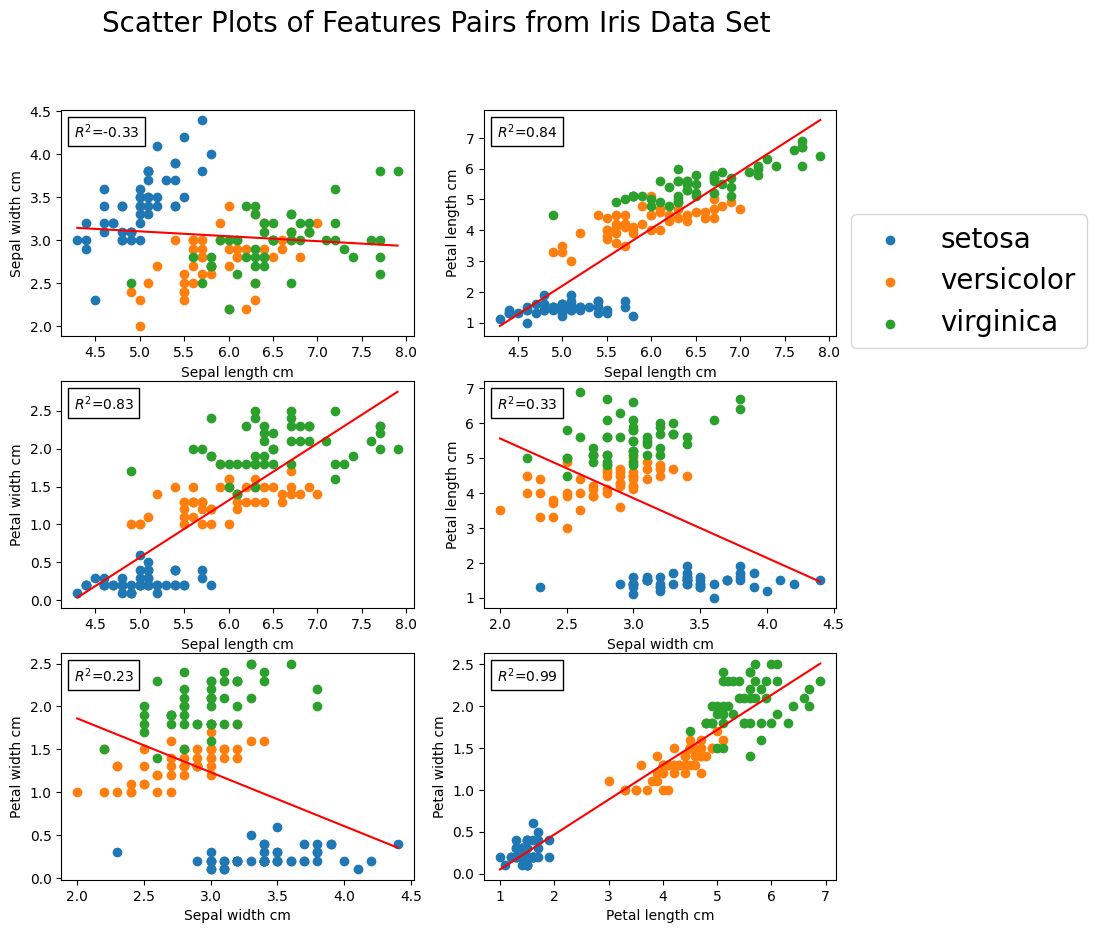

In [310]:
#---- Step 1.
""""
To have all scatter plots on the same figure, we will create a subplot 
layout with 6 axes for each feature pair. This step returns two items, 
fig and axs, where fig stands for a figure and axs stands for 6 axs. 
If we want to modify global view of the figure, then we have to use a fig object, 
else, use axs object to edit the axes."""

# Define a layout of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))


#---- Step 2.
# Use a for loop to go through each axis in the axs object and plot a scatter plot.
# Flatten out the axs object
axs = axs.flat

# We will use count to track the # of scatter plots and used axes
count = 0

# Define features names
features = df.iloc[:,:4].columns

# Go through each axis in the previously defined layout 
# and plot a scatter plot of the feature pair.
for i in range(len(features) - 1):
    plot_scatter(df, axs[count], features[i], features[i+1])
    # add one after using an axis
    count += 1
    
    # Checks if i+2 is not larger than 3,
    # else, it plots the feature pair i and i+2
    if i+2 < 4:
        plot_scatter(df, axs[count], features[i], features[i+2])
        # add one after using an axis
        count += 1
        
    # Checks if i+3 is not larger than 3,
    # else, it plots the feature pair i and i+3
    if i+3 < 4:
        plot_scatter(df, axs[count], features[i], features[i+3])
        # add one after using an axis
        count += 1

#---- Step 3.
# Define the fine details of a figure such as legend and title.
# Set the legend of the figure
# df["class"].unique() gives the names of the three Iris classes
plt.legend(df["species"].unique(), bbox_to_anchor=(1.75, 3), ncol=1, prop={'size': 20})
# Set the title of a figure
fig.suptitle("Scatter Plots of Features Pairs from Iris Data Set", fontsize=20)
# Save the figure
plt.savefig("scatter_plots.png", dpi=300, bbox_inches = 'tight')
# Show the figure
plt.show()

## Calculating correlation matrix with inherented pandas df function corr()

In [311]:
# Exclude columns in a pandas df  
# https://www.geeksforgeeks.org/how-to-exclude-columns-in-pandas/ 

# Calculate the correlation matrix  
# https://stackoverflow.com/questions/39409866/correlation-heatmap  

corr = df.drop(columns=["species"]).corr()

In [312]:
# Round the numbers in numpy array  
# https://www.programiz.com/python-programming/numpy/methods/round 

corr = np.array(corr)
corr = np.round(corr, 2)

## Fill diagonal and upper half with NaNs

The upper and the bottom right and left corners, respectively, of the correlation matrix are the mirror representation of each other. They give the same information. Therefore, we need to see only a one of them in the graph to exclude redundant information and make the plot easy to read. Therefore, here I will fill the upper right top triangle of the correlation matrix with nan values so that the upper right portion of the correlation matrix graph would be empty. 

In [313]:
# Create a numpy array, with zero values, of the same size as the input  
# https://numpy.org/doc/2.2/reference/generated/numpy.zeros_like.html  
mask = np.zeros_like(corr, dtype=bool)

# Set the numbers of right-upper triangle of a numpy array to a certain value  
# https://numpy.org/doc/2.1/reference/generated/numpy.triu_indices_from.html  
mask[np.triu_indices_from(mask, k=1)] = True
corr[mask] = np.nan

## Plot the correlation matrix

*Setting up the color bar  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html* 

*Examples of a color palette  
https://matplotlib.org/stable/users/explain/colors/colormaps.html* 

*Example on how to remove the spines of a figure  
https://www.statology.org/matplotlib-remove-fram*  

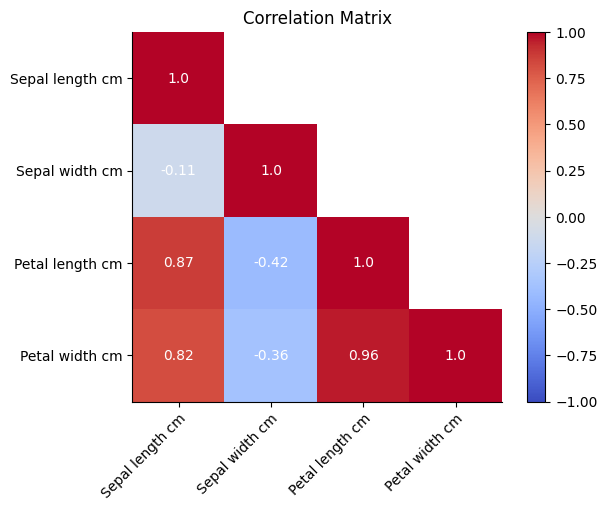

In [314]:
""""Initialize the figure first so you could remove the spines
If you will try to remove spines without initialising a figure
it won't figure on the first run of a cell but it will only
work on the following attempts when the figure is initialised
on the first attempt."""
plt.figure()
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

# Set the minimum and maximum values in a colour bar
vmax = 1
vmin = -1
# Create a pseudocolour image
cax = plt.imshow(corr, cmap="coolwarm", vmin=vmin, vmax=vmax)

# Add a colorbar 
cbar = plt.colorbar(cax)


# Get the feature names from the iris.feature_names
# Replace (cm) with empty string and capitalise the string
features = [feature.replace("_(cm)", "").replace("_", " ").capitalize() for feature in features]


# Show all ticks and label them with the respective list entries
plt.xticks(range(len(features)), labels=features,
               rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(range(len(features)), labels=features)


# Loop over data dimensionss and create text annotations.
for i in range(len(features)):
    for j in range(len(features)):
        text = plt.text(j, i, corr[i, j],
                       ha="center", va="center", color="w")
        


# Set the title
plt.title("Correlation Matrix")
plt.savefig("features_correlation_plot.png", dpi=300, bbox_inches = 'tight')
# # Show the plot
plt.show()